## 1.Crear notebook y añadir a Github

Hacemos git clone en la terminal de https://github.com/20rd1/actividad_github 

Luego creamos un notebook dentro de la carpeta de github, new file y le ponemos un nombre. En mi caso ECASVILL.ipynb (importante poner el .ipynb para que se cree el notebook)

Por último añadimos el archivo csv. Lo descargamos de kaggle y lo añadimos a la carpeta donde están los notebooks de github, en mi caso StudentsPerformance.csv

# Análisis del dataset csv y Exploración de datos

Añadimos python, creando desde Anaconda un enviroment de python y lo ponemos dentro de visual studio, en mi caso se llama actividad y traemos python y lo ejecutamos.

In [5]:
import pandas as pd

Leemos el csv para saber el contenido. Leemos los 15 primeros.

In [6]:
df=pd.read_csv("StudentsPerformance.csv")
df.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Ahora vamos a ver como de grande es el dataset. Podemos ver que contiene 1000 filas y 8 columnas

In [7]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

Lo siguiente que vamos a ver es que tipo de variables contiene. Podemos ver que no hay valores nulos, es decir es un dataset limpio para su análisis.
Tipos de variables:
- Tenemos 5 de tipo object (que son de tipo cualitativas) 
- 3 de tipo int (cuantitativas, de tipo numéricas)

In [8]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Análisis del problema y Selección de técnica

# 1-Objetivo

El objetivo de este dataset es comparar el rendimiento de un conjunto de estudiantes mediante las notas obtenidas por cada estudiante en tres asignaturas seleccionadas, en este caso matemáticas, lectura y escritura. La comparación se hace relacionandose con los factores demográficos, el nivel educativo de los padres y si han pasado el curso de preparación o no. 

# 2-Selección de técnica

Usaría la técnica de regresión, ya que las variables más importantes son las numéricas, es decir las notas de las 3 asignaturasl. Cogería de variable target cualquiera de las 3, por ej. las notas de matemáticas, y mediante la información que tenemos de las demás variables se puede llegar a predecir que nota sacaría, mediante las otras 2.

## 3-Sesgos

En este datasete encontramos varios sesgos a tener en cuenta basados en la diferenciación de grupos en función de:
- Los grupos representados en la variable race/ethnity, los grupos están muy dispares y pueden crear porblemas diferenciar entre ellos a la hora de controlar el dataset.
- En el caso del nivel educativo de los padres pasa parecido, la gran mayoría tiene estudios medios, pero una pequeña minoría tiene master's degree, haciendo que pueda ser inestable esta variable.
- Diferenciar entre el nivel económico, donde casi el doble son estandar, haciendo que el modelo pueda tener poblemas.

## Análisis descrpitivo

a. Medidas de tendencia

In [9]:
# MEDIA
Media = df.mean(numeric_only=True)
print(Media)

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64


In [10]:
# MEDIANA
Mediana = df.median(numeric_only=True)
print(Mediana)

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64


In [11]:
# MODA - Es el valor que más se repite
Moda = df.mode().iloc[0]
print(Moda)

gender                               female
race/ethnicity                      group C
parental level of education    some college
lunch                              standard
test preparation course                none
math score                               65
reading score                            72
writing score                            74
Name: 0, dtype: object


b. Medidas de dispersión

In [12]:
# RANGO
Rango = df.max(numeric_only=True) - df.min(numeric_only=True)
print(Rango)

math score       100
reading score     83
writing score     90
dtype: int64


In [13]:
# VARIANZA
Varianza = df.var(numeric_only=True)
print(Varianza)

math score       229.918998
reading score    213.165605
writing score    230.907992
dtype: float64


In [14]:
# RANGO INTERCUARTILICO (IQR)
Q1 = df.quantile(0.25,numeric_only=True)
Q3 = df.quantile(0.75,numeric_only=True)
IQR = Q3 - Q1
print(IQR)



math score       20.00
reading score    20.00
writing score    21.25
dtype: float64


c. Medidas de Posición

In [15]:
# CUARTILES
Cuartil_1 = df.quantile(0.25,numeric_only=True)
Cuartil_2 = df.quantile(0.50,numeric_only=True)
Cuartil_3 = df.quantile(0.75,numeric_only=True)
print(Cuartil_1)
print(Cuartil_2)
print(Cuartil_3)

math score       57.00
reading score    59.00
writing score    57.75
Name: 0.25, dtype: float64
math score       66.0
reading score    70.0
writing score    69.0
Name: 0.5, dtype: float64
math score       77.0
reading score    79.0
writing score    79.0
Name: 0.75, dtype: float64


In [16]:
# PERCENTILES
Percentil_10 = df.quantile(0.10,numeric_only=True)
Percentil_90 = df.quantile(0.90,numeric_only=True)
print(Percentil_10)
print(Percentil_90)

math score       47.0
reading score    51.0
writing score    48.0
Name: 0.1, dtype: float64
math score       86.0
reading score    87.1
writing score    87.0
Name: 0.9, dtype: float64


d. Representación Gráfica

Note: you may need to restart the kernel to use updated packages.


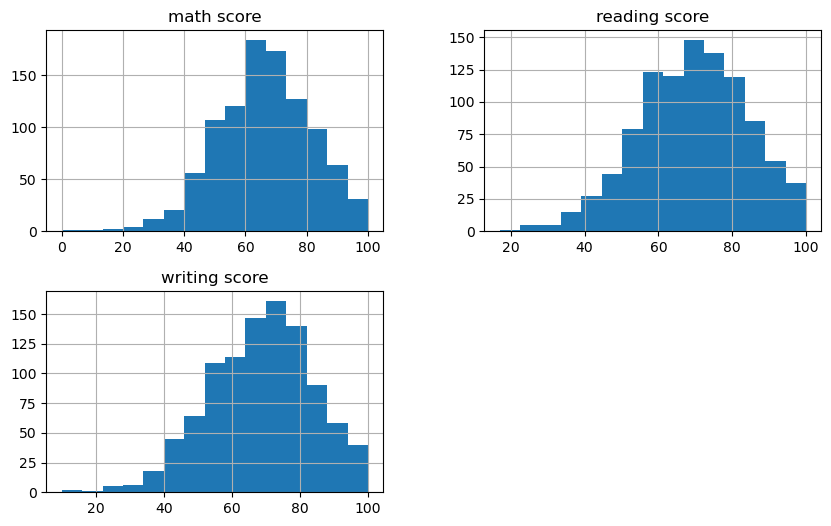

In [21]:
# Representación gráfica de los datos
%pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# Histograma
df.hist(bins=15, figsize=(10, 6))
plt.show()


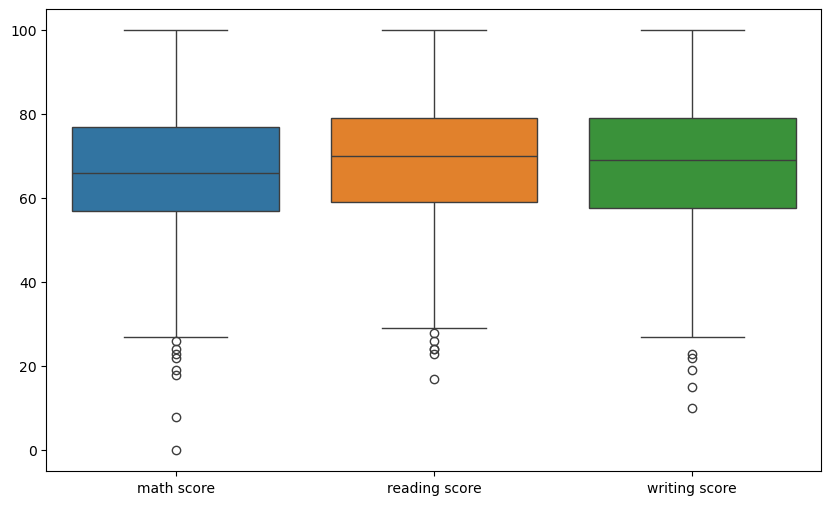

In [ ]:
# Boxplot = Para detectar valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.show()

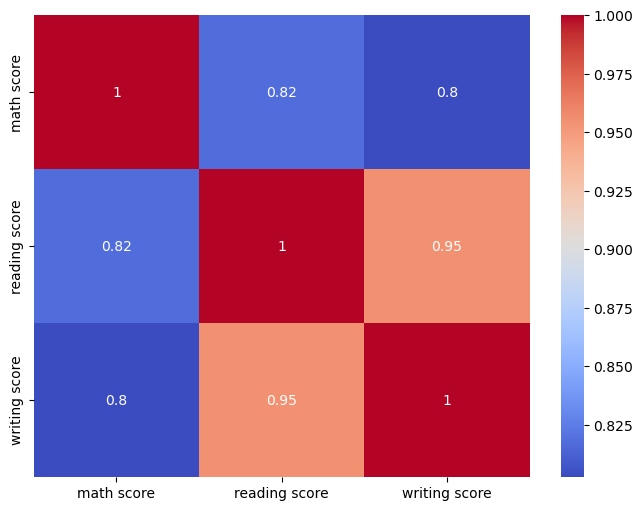

In [24]:
# Heatmap - Mapa de calor para ver correlaciones
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

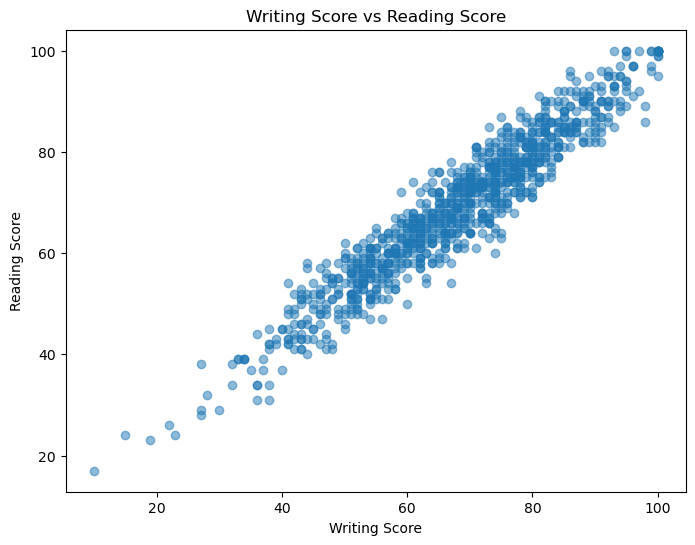

In [28]:
# Scatter plot - Diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['writing score'], df['reading score'], alpha=0.5)
plt.title('Writing Score vs Reading Score')
plt.xlabel('Writing Score')
plt.ylabel('Reading Score')
plt.show()

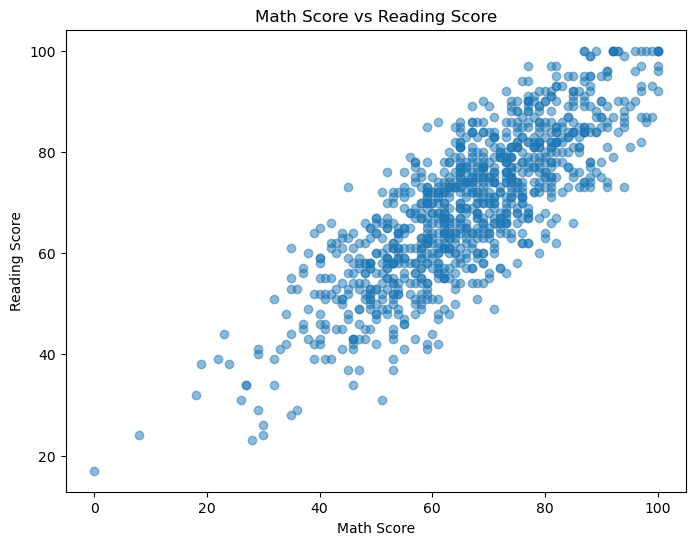

In [29]:
# Scatter plot - Diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['math score'], df['reading score'], alpha=0.5)
plt.title('Math Score vs Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

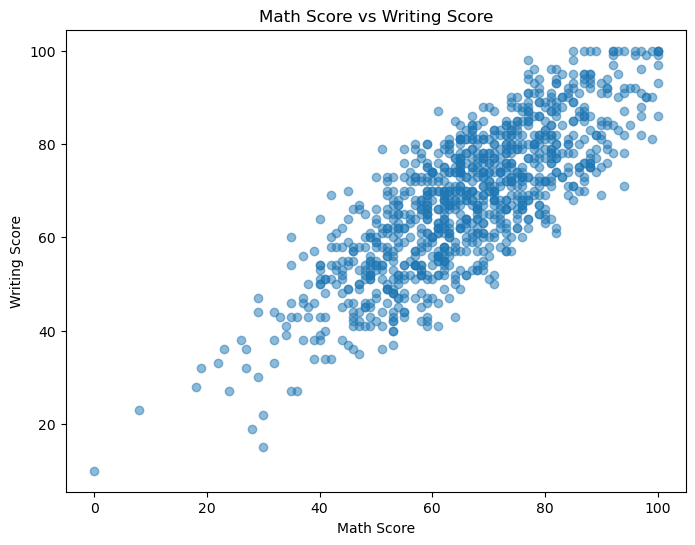

In [34]:
# Scatter plot - Diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['math score'], df['writing score'], alpha=0.5)
plt.title('Math Score vs Writing Score')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.show()

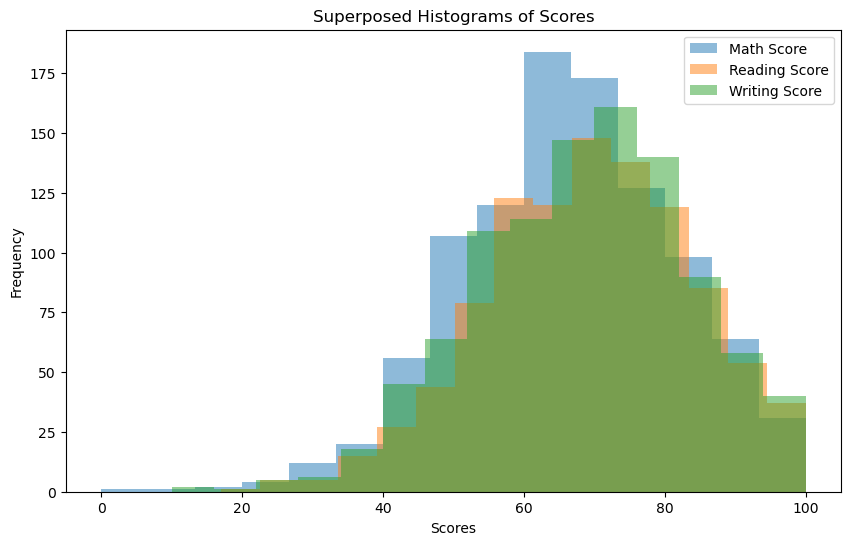

In [46]:
# Histograma superpuesto
plt.figure(figsize=(10, 6))
plt.hist(df['math score'], bins=15, alpha=0.5, label='Math Score')
plt.hist(df['reading score'], bins=15, alpha=0.5, label='Reading Score')
plt.hist(df['writing score'], bins=15, alpha=0.5, label='Writing Score')
plt.title('Superposed Histograms of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_3360\4248347626.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='test preparation course', y='math score', palette='Set2', ax=axes[0])
C:\Users\eduar\AppData\Local\Temp\ipykernel_3360\4248347626.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='test preparation course', y='reading score', palette='Set2', ax=axes[1])
C:\Users\eduar\AppData\Local\Temp\ipykernel_3360\4248347626.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='test preparation course', y='w

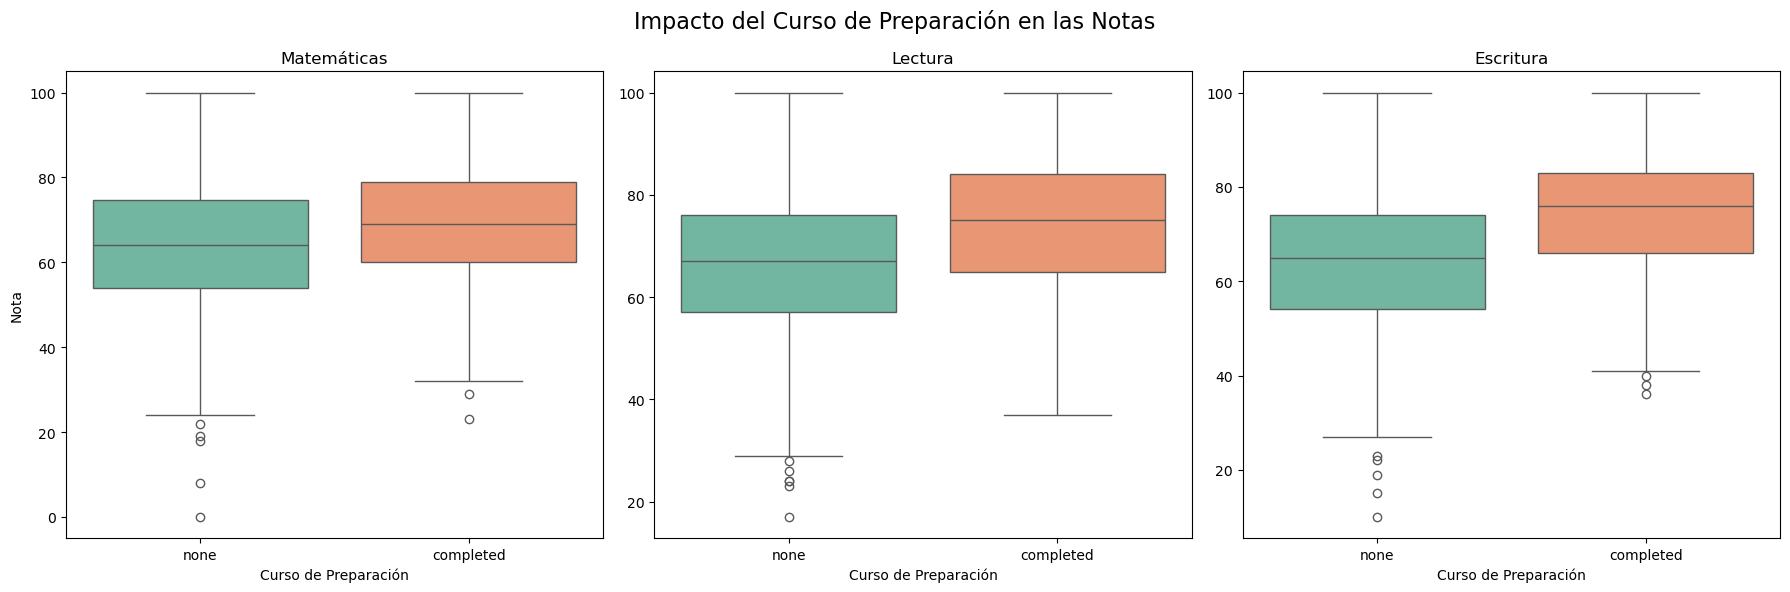

In [47]:

# 1. Configurar el tamaño de la figura (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 2. Gráfico de Matemáticas
sns.boxplot(data=df, x='test preparation course', y='math score', palette='Set2', ax=axes[0])
axes[0].set_title('Matemáticas')
axes[0].set_xlabel('Curso de Preparación')
axes[0].set_ylabel('Nota')

# 3. Gráfico de Lectura
sns.boxplot(data=df, x='test preparation course', y='reading score', palette='Set2', ax=axes[1])
axes[1].set_title('Lectura')
axes[1].set_xlabel('Curso de Preparación')
axes[1].set_ylabel('') # Quitamos la etiqueta Y para que quede más limpio

# 4. Gráfico de Escritura
sns.boxplot(data=df, x='test preparation course', y='writing score', palette='Set2', ax=axes[2])
axes[2].set_title('Escritura')
axes[2].set_xlabel('Curso de Preparación')
axes[2].set_ylabel('')

# Título general
plt.suptitle('Impacto del Curso de Preparación en las Notas', fontsize=16)
plt.tight_layout()
plt.show()

Se puede observar que los que han completado el curso preparatorio aumentan el rendimiento promedio en las 3 asignaturas, ya que las medianas son más altas. Además, los alumnos que completaron el curso tienen notas más consistentes y predecibles que los que no. Observando los valores atípicos, se puede obsevar que hay menor número en los que si lo completaron.

# PRUEBA ENTRENAMIENTO PREDICCIÓN VARIABLE MATH SCORE

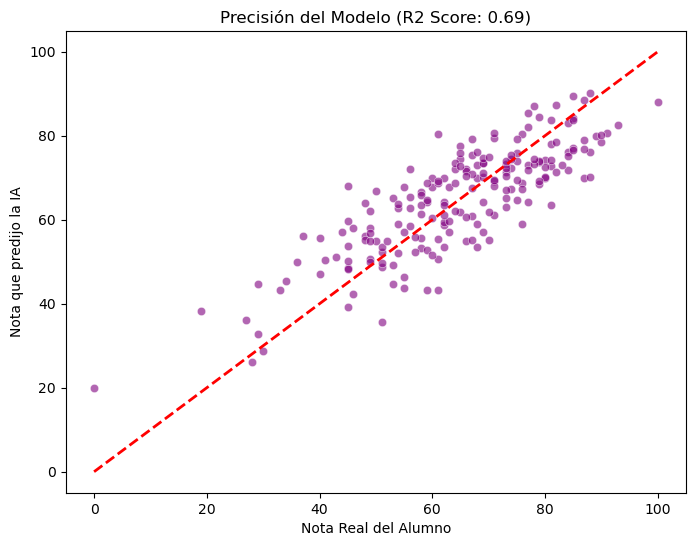

¡Modelo entrenado exitosamente!


In [5]:
# 1. Importamos TODAS las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 2. CARGAMOS EL DATASET (Esta es la línea que faltaba)
# Asegúrate de que el archivo 'StudentsPerformance.csv' esté en la misma carpeta
df = pd.read_csv('StudentsPerformance.csv')

# 3. Preparar los datos
# Convertimos 'completed' a 1 y 'none' a 0
df['course_numeric'] = df['test preparation course'].apply(lambda x: 1 if x == 'completed' else 0)

# X son las pistas (Features), y es lo que queremos adivinar (Target)
X = df[['reading score', 'writing score', 'course_numeric']]
y = df['math score']

# 4. Separar en Entrenamiento (80%) y Examen (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 6. Probar y Visualizar
predicciones = modelo.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predicciones, alpha=0.6, color='purple')
plt.plot([0, 100], [0, 100], '--r', linewidth=2) # Línea de perfección
plt.title(f'Precisión del Modelo (R2 Score: {r2_score(y_test, predicciones):.2f})')
plt.xlabel('Nota Real del Alumno')
plt.ylabel('Nota que predijo la IA')
plt.show()

print("¡Modelo entrenado exitosamente!")